**ID A1812**

**Submission Date : 10/04/2019**

# House Prices: Advanced Regression Techniques

# Abstract:
House Price prediction is a very popular dataset for data science competation. In this dataset 79 explanatory variables describing (almost) every aspect of residential homes in Ames and Iowa. This competition challenges compitator to predict the final price of each home.

I have devided my work in two part.First, data processing where I have visualized, cleaned, handled missing data, carefully modified , removed and merged some features. Second model selection In this part I have used gradient boosting, decision tree, random forest regration and Artificial neural network for this section. Finally I have showed that with regularization and proper hyperparameter tuning ANN can perform better or similar to xgboost and other models for this problem.


# Score:


## Best Score (XGBOOST + LASSO ensemble learning)
<img src="img/Screenshot.png">

## All score

<img src="img/kaggle_score.png">

# Imports:

#### Gpu testing

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from sklearn.preprocessing import normalize,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
# %matplotlib widget
%matplotlib inline

# Data Pre-processing

### Load Data

In [3]:
train = pd.read_csv('train.csv')#.select_dtypes(exclude=['object'])
test = pd.read_csv('test.csv')#.select_dtypes(exclude=['object'])

#look into datatypes of the file
print("data types count")
train.dtypes.groupby(train.dtypes).count()


data types count


int64      35
float64     3
object     43
dtype: int64

### Looking into data

In [4]:
print('show sample')
pd.set_option('display.max_column', None)
train.head()

show sample


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print('description of data')
train.describe()

description of data


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


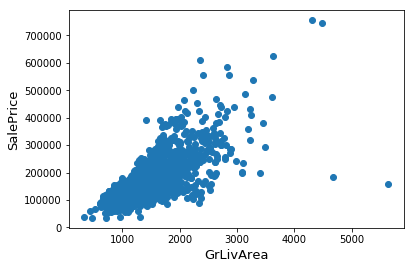

In [6]:

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

 There are a few houses with more than 4000 sq ft living area that are
 outliers, so we drop them from the training data.

In [7]:
train.drop(train[ (train["GrLivArea"] > 4000) & (train['SalePrice']<400000) ].index, inplace=True)

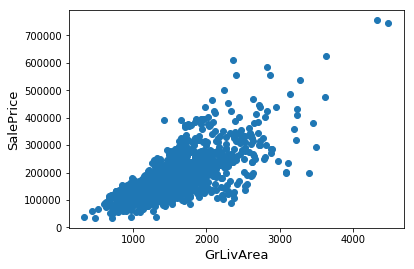

In [8]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### RMSE

In [9]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

### Imputing missing data


In [10]:
lot_frontage_by_neighborhood = train["LotFrontage"].groupby(train["Neighborhood"])

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def factorize(df, factor_df, column, fill_na=None):
    factor_df[column] = df[column]
    if fill_na is not None:
        factor_df[column].fillna(fill_na, inplace=True)
    le.fit(factor_df[column].unique())
    factor_df[column] = le.transform(factor_df[column])
    return factor_df

### common data processing:
In this part we have lebel encoded some of the columns because some features are ordinal. I have replaced some null value with zero because in those case they probably meant that it may not exist . Finally I have merged some of the features to get a better feature. 

In [12]:
def data_process(df):
    all_df = pd.DataFrame(index = df.index)

    all_df["LotFrontage"] = df["LotFrontage"]   
    for key, group in lot_frontage_by_neighborhood:
        #Filling in missing LotFrontage values by the median
        idx = (df["Neighborhood"] == key) & (df["LotFrontage"].isnull())
        all_df.loc[idx, "LotFrontage"] = group.median()    
        all_df["LotArea"] = df["LotArea"]

    all_df["MasVnrArea"] = df["MasVnrArea"]
    all_df["MasVnrArea"].fillna(0, inplace=True)
   
    all_df["BsmtFinSF1"] = df["BsmtFinSF1"]
    all_df["BsmtFinSF1"].fillna(0, inplace=True)

    all_df["BsmtFinSF2"] = df["BsmtFinSF2"]
    all_df["BsmtFinSF2"].fillna(0, inplace=True)

    all_df["BsmtUnfSF"] = df["BsmtUnfSF"]
    all_df["BsmtUnfSF"].fillna(0, inplace=True)

    all_df["TotalBsmtSF"] = df["TotalBsmtSF"]
    all_df["TotalBsmtSF"].fillna(0, inplace=True)

    all_df["1stFlrSF"] = df["1stFlrSF"]
    all_df["2ndFlrSF"] = df["2ndFlrSF"]
    all_df["GrLivArea"] = df["GrLivArea"]
    
    all_df["GarageArea"] = df["GarageArea"]
    all_df["GarageArea"].fillna(0, inplace=True)

    all_df["WoodDeckSF"] = df["WoodDeckSF"]
    all_df["OpenPorchSF"] = df["OpenPorchSF"]
    all_df["EnclosedPorch"] = df["EnclosedPorch"]
    all_df["3SsnPorch"] = df["3SsnPorch"]
    all_df["ScreenPorch"] = df["ScreenPorch"]
    
    all_df["BsmtFullBath"] = df["BsmtFullBath"]
    all_df["BsmtFullBath"].fillna(0, inplace=True)

    all_df["BsmtHalfBath"] = df["BsmtHalfBath"]
    all_df["BsmtHalfBath"].fillna(0, inplace=True)

    all_df["FullBath"] = df["FullBath"] 
    all_df["HalfBath"] = df["HalfBath"] 
    all_df["BedroomAbvGr"] = df["BedroomAbvGr"] 
    all_df["KitchenAbvGr"] = df["KitchenAbvGr"] 
    all_df["TotRmsAbvGrd"] = df["TotRmsAbvGrd"] 
    all_df["Fireplaces"] = df["Fireplaces"] 

    all_df["GarageCars"] = df["GarageCars"]
    all_df["GarageCars"].fillna(0, inplace=True)

    all_df["CentralAir"] = (df["CentralAir"] == "Y") * 1.0
   
    all_df["OverallQual"] = df["OverallQual"]
    all_df["OverallCond"] = df["OverallCond"]

    
    """following case are ordinal so we are performing label encoding here"""
    
    nan = float('nan')
    qual_dict = {nan: 0, "NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
    all_df["ExterQual"] = df["ExterQual"].map(qual_dict).astype(int)
    all_df["ExterCond"] = df["ExterCond"].map(qual_dict).astype(int)
    all_df["BsmtQual"] = df["BsmtQual"].map(qual_dict).astype(int)
    all_df["BsmtCond"] = df["BsmtCond"].map(qual_dict).astype(int)
    all_df["HeatingQC"] = df["HeatingQC"].map(qual_dict).astype(int)
    all_df["KitchenQual"] = df["KitchenQual"].map(qual_dict).astype(int)
    all_df["FireplaceQu"] = df["FireplaceQu"].map(qual_dict).astype(int)
    all_df["GarageQual"] = df["GarageQual"].map(qual_dict).astype(int)
    all_df["GarageCond"] = df["GarageCond"].map(qual_dict).astype(int)

    all_df["BsmtExposure"] = df["BsmtExposure"].map(
        {nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

    bsmt_fin_dict = {nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
    all_df["BsmtFinType1"] = df["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
    all_df["BsmtFinType2"] = df["BsmtFinType2"].map(bsmt_fin_dict).astype(int)

    all_df["Functional"] = df["Functional"].map(
        {nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, 
         "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

    all_df["GarageFinish"] = df["GarageFinish"].map(
        {nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)

    all_df["Fence"] = df["Fence"].map(
        {nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

    all_df["PoolQC"] = df["PoolQC"].map(qual_dict).astype(int)
    
    all_df["YearBuilt"] = df["YearBuilt"]
    all_df["YearRemodAdd"] = df["YearRemodAdd"]

    all_df["GarageYrBlt"] = df["GarageYrBlt"]
    all_df["GarageYrBlt"].fillna(0.0, inplace=True)

    all_df["MoSold"] = df["MoSold"]
    all_df["YrSold"] = df["YrSold"]
    
    all_df["LowQualFinSF"] = df["LowQualFinSF"]
    all_df["MiscVal"] = df["MiscVal"]

    all_df["PoolQC"] = df["PoolQC"].map(qual_dict).astype(int)

    all_df["PoolArea"] = df["PoolArea"]
    all_df["PoolArea"].fillna(0, inplace=True)
    
    # Add categorical features as numbers too. It seems to help a bit.
    all_df = factorize(df, all_df, "MSSubClass")
    all_df = factorize(df, all_df, "MSZoning", "RL")
    all_df = factorize(df, all_df, "LotConfig")
    all_df = factorize(df, all_df, "Neighborhood")
    all_df = factorize(df, all_df, "Condition1")
    all_df = factorize(df, all_df, "BldgType")
    all_df = factorize(df, all_df, "HouseStyle")
    all_df = factorize(df, all_df, "RoofStyle")
    all_df = factorize(df, all_df, "Exterior1st", "Other")
    all_df = factorize(df, all_df, "Exterior2nd", "Other")
    all_df = factorize(df, all_df, "MasVnrType", "None")
    all_df = factorize(df, all_df, "Foundation")
    all_df = factorize(df, all_df, "SaleType", "Oth")
    all_df = factorize(df, all_df, "SaleCondition")

    """In following code I am converting values of those features as 0 or 1"""
    
    # IR2 and IR3 don't appear that often, so just make a distinction
    # between regular and irregular.
    all_df["IsRegularLotShape"] = (df["LotShape"] == "Reg") * 1

    # Most properties are level; bin the other possibilities together
    # as "not level".
    all_df["IsLandLevel"] = (df["LandContour"] == "Lvl") * 1

    # Most land slopes are gentle; treat the others as "not gentle".
    all_df["IsLandSlopeGentle"] = (df["LandSlope"] == "Gtl") * 1

    # Most properties use standard circuit breakers.
    all_df["IsElectricalSBrkr"] = (df["Electrical"] == "SBrkr") * 1

    # About 2/3rd have an attached garage.
    all_df["IsGarageDetached"] = (df["GarageType"] == "Detchd") * 1

    # Most have a paved drive. Treat dirt/gravel and partial pavement
    # as "not paved".
    all_df["IsPavedDrive"] = (df["PavedDrive"] == "Y") * 1

    # The only interesting "misc. feature" is the presence of a shed.
    all_df["HasShed"] = (df["MiscFeature"] == "Shed") * 1.  

    # If YearRemodAdd != YearBuilt, then a remodeling took place at some point.
    all_df["Remodeled"] = (all_df["YearRemodAdd"] != all_df["YearBuilt"]) * 1
    
    # Did a remodeling happen in the year the house was sold?
    all_df["RecentRemodel"] = (all_df["YearRemodAdd"] == all_df["YrSold"]) * 1
    
    # Was this house sold in the year it was built?
    all_df["VeryNewHouse"] = (all_df["YearBuilt"] == all_df["YrSold"]) * 1

    all_df["Has2ndFloor"] = (all_df["2ndFlrSF"] == 0) * 1
    all_df["HasMasVnr"] = (all_df["MasVnrArea"] == 0) * 1
    all_df["HasWoodDeck"] = (all_df["WoodDeckSF"] == 0) * 1
    all_df["HasOpenPorch"] = (all_df["OpenPorchSF"] == 0) * 1
    all_df["HasEnclosedPorch"] = (all_df["EnclosedPorch"] == 0) * 1
    all_df["Has3SsnPorch"] = (all_df["3SsnPorch"] == 0) * 1
    all_df["HasScreenPorch"] = (all_df["ScreenPorch"] == 0) * 1
    
    # Months with the largest number of deals may be significant.
#     mx = max(train["MoSold"].groupby(train["MoSold"]).count())
#     all_df["HighSeason"] = df["MoSold"].replace(
#         train["MoSold"].groupby(train["MoSold"]).count()/mx)

#     mx = max(train["MSSubClass"].groupby(train["MSSubClass"]).count())
#     all_df["NewerDwelling"] = df["MSSubClass"].replace(
#         train["MSSubClass"].groupby(train["MSSubClass"]).count()/mx)  

    # following portion was calculated with above commented part of the code.
    # Instead of the fraction value putting binary value helps for generalization 
    all_df["HighSeason"] = df["MoSold"].replace( 
        {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})

    all_df["NewerDwelling"] = df["MSSubClass"].replace(
        {20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,
         90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})   
    
    
    all_df.loc[df.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
    all_df["Neighborhood_Good"].fillna(0, inplace=True)
    
    # House completed before sale or not
    all_df["SaleCondition_PriceDown"] = df.SaleCondition.replace(
        {'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

    # House completed before sale or not
    all_df["BoughtOffPlan"] = df.SaleCondition.replace(
        {"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
    
    all_df["BadHeating"] = df.HeatingQC.replace(
        {'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

    area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]
    all_df["TotalArea"] = all_df[area_cols].sum(axis=1)

    all_df["TotalArea1st2nd"] = all_df["1stFlrSF"] + all_df["2ndFlrSF"]

    all_df["Age"] = 2010 - all_df["YearBuilt"]
    all_df["TimeSinceSold"] = 2010 - all_df["YrSold"]

    all_df["SeasonSold"] = all_df["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 
                                                  6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
    
    all_df["YearsSinceRemodel"] = all_df["YrSold"] - all_df["YearRemodAdd"]
    
    # Simplifications of existing features into bad/average/good.
    all_df["SimplOverallQual"] = all_df.OverallQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
    all_df["SimplOverallCond"] = all_df.OverallCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
    all_df["SimplPoolQC"] = all_df.PoolQC.replace(
        {1 : 1, 2 : 1, 3 : 2, 4 : 2})
    all_df["SimplGarageCond"] = all_df.GarageCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplGarageQual"] = all_df.GarageQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplFireplaceQu"] = all_df.FireplaceQu.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplFireplaceQu"] = all_df.FireplaceQu.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplFunctional"] = all_df.Functional.replace(
        {1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
    all_df["SimplKitchenQual"] = all_df.KitchenQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplHeatingQC"] = all_df.HeatingQC.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplBsmtFinType1"] = all_df.BsmtFinType1.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
    all_df["SimplBsmtFinType2"] = all_df.BsmtFinType2.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
    all_df["SimplBsmtCond"] = all_df.BsmtCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplBsmtQual"] = all_df.BsmtQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplExterCond"] = all_df.ExterCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplExterQual"] = all_df.ExterQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
            
    # Bin by neighborhood (a little arbitrarily). Values were computed by: 
    # train_df["SalePrice"].groupby(train_df["Neighborhood"]).median().sort_values()
    neighborhood_map = {
        "MeadowV" : 0,  #  88000
        "IDOTRR" : 1,   # 103000
        "BrDale" : 1,   # 106000
        "OldTown" : 1,  # 119000
        "Edwards" : 1,  # 119500
        "BrkSide" : 1,  # 124300
        "Sawyer" : 1,   # 135000
        "Blueste" : 1,  # 137500
        "SWISU" : 2,    # 139500
        "NAmes" : 2,    # 140000
        "NPkVill" : 2,  # 146000
        "Mitchel" : 2,  # 153500
        "SawyerW" : 2,  # 179900
        "Gilbert" : 2,  # 181000
        "NWAmes" : 2,   # 182900
        "Blmngtn" : 2,  # 191000
        "CollgCr" : 2,  # 197200
        "ClearCr" : 3,  # 200250
        "Crawfor" : 3,  # 200624
        "Veenker" : 3,  # 218000
        "Somerst" : 3,  # 225500
        "Timber" : 3,   # 228475
        "StoneBr" : 4,  # 278000
        "NoRidge" : 4,  # 290000
        "NridgHt" : 4,  # 315000
    }

    all_df["NeighborhoodBin"] = df["Neighborhood"].map(neighborhood_map)
    return all_df

In [13]:
train_processed = data_process(train)
test_processed = data_process(test)

print("shape of train :" , train_processed.shape)
print("shape of test :" , test_processed.shape)


shape of train : (1458, 111)
shape of test : (1459, 111)


Keeping NeighborhoodBin into a temporary DataFrame because we want to use the unscaled version later on (to one-hot encode it). 

In [14]:
# Keeping NeighborhoodBin into a temporary DataFrame because we want to use the
# unscaled version later on (to one-hot encode it). 
neighborhood_bin_train = pd.DataFrame(index = train.index)
neighborhood_bin_train["NeighborhoodBin"] = train_processed["NeighborhoodBin"]
neighborhood_bin_test = pd.DataFrame(index = test.index)
neighborhood_bin_test["NeighborhoodBin"] = test_processed["NeighborhoodBin"]


## Skewness & Normalization

### skewness train set

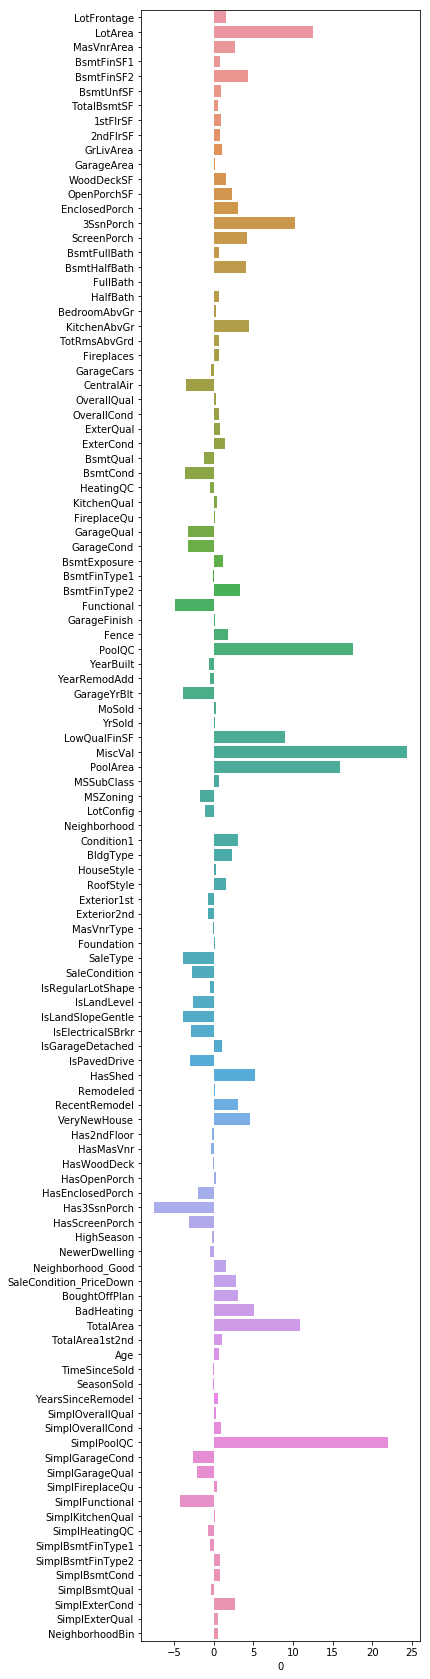

In [15]:
from scipy.stats import skew
import seaborn as sns
numeric_features = train_processed.dtypes[train_processed.dtypes != "object"].index

skewness = train_processed[numeric_features].skew(axis=0 , skipna =True)
skewness = pd.DataFrame(skewness)
plt.figure(figsize=[5,30])
# skw = sns.load_dataset(skewness)
ax = sns.barplot( y= skewness.index , x=skewness[0] , data = skewness)
plt.show()
# print('skew: ',train_processed[numeric_features].skew())

In [16]:
numeric_features = train_processed.dtypes[train_processed.dtypes != "object"].index

# Transform the skewed numeric features by taking log(feature + 1).
# This will make the features more normal.
from scipy.stats import skew

skewed = train_processed[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[(skewed < -0.75) | (skewed > 0.75)]
skewed = skewed.index

train_processed[skewed] = np.log1p(train_processed[skewed])


# Additional processing: scale the data.   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(train_processed[numeric_features])

for i, col in enumerate(numeric_features):
    train_processed[col] = scaled[:, i]

/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


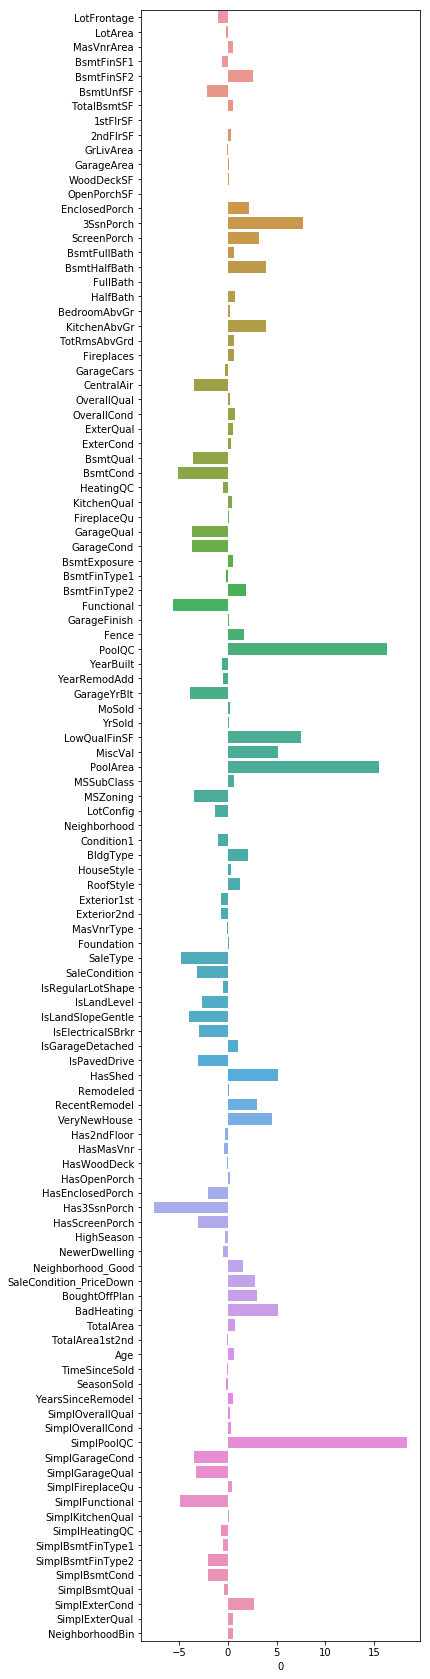

In [17]:
from scipy.stats import skew
numeric_features = train_processed.dtypes[train_processed.dtypes != "object"].index
skewness = train_processed[numeric_features].skew(axis=0 , skipna =True)
skewness = pd.DataFrame(skewness)
plt.figure(figsize=[5,30])
# skw = sns.load_dataset(skewness)
ax = sns.barplot( y= skewness.index , x=skewness[0] , data = skewness)
plt.show()

### Test Skewness

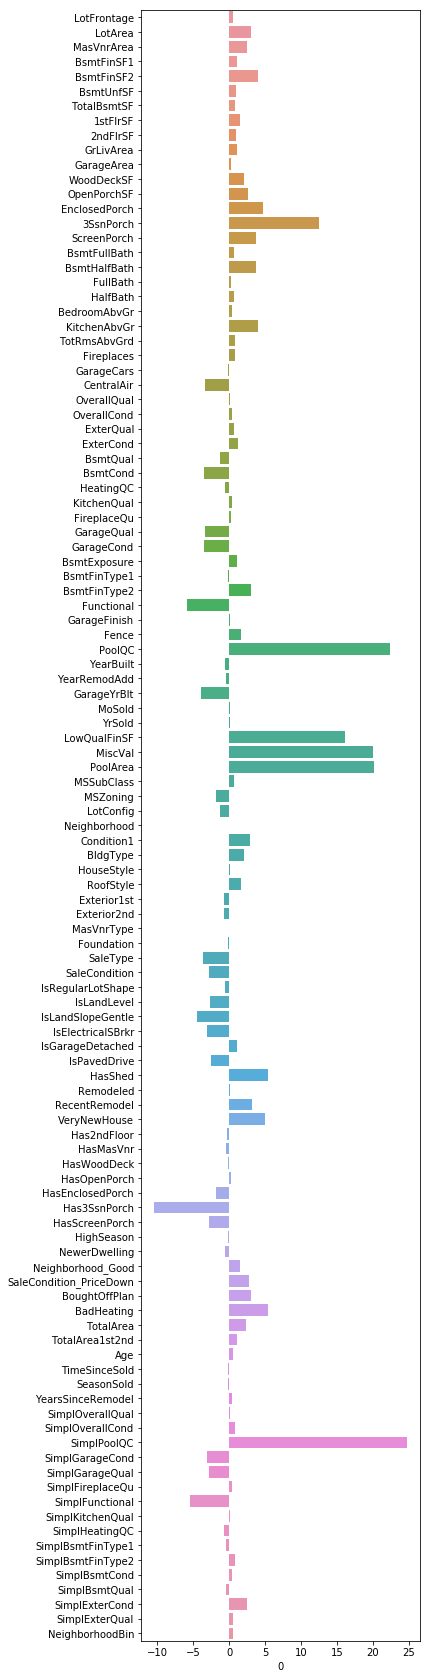

In [18]:
numeric_features = test_processed.dtypes[train_processed.dtypes != "object"].index
skewness = test_processed[numeric_features].skew(axis=0 , skipna =True)
skewness = pd.DataFrame(skewness)

plt.figure(figsize=[5,30])
# skw = sns.load_dataset(skewness)
ax = sns.barplot( y= skewness.index , x=skewness[0] , data = skewness)
plt.show()
# print('skew: ',test_processed[numeric_features].skew())

In [19]:
numeric_features = test_processed.dtypes[train_processed.dtypes != "object"].index

# Transform the skewed numeric features by taking log(feature + 1).
# This will make the features more normal.
from scipy.stats import skew

skewed = test_processed[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[(skewed < -0.75) | (skewed > 0.75)]
skewed = skewed.index

test_processed[skewed] = np.log1p(test_processed[skewed])

# Additional processing: scale the data.   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled = scaler.fit_transform(test_processed[numeric_features])
for i, col in enumerate(numeric_features):
    test_processed[col] = scaled[:, i]

/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


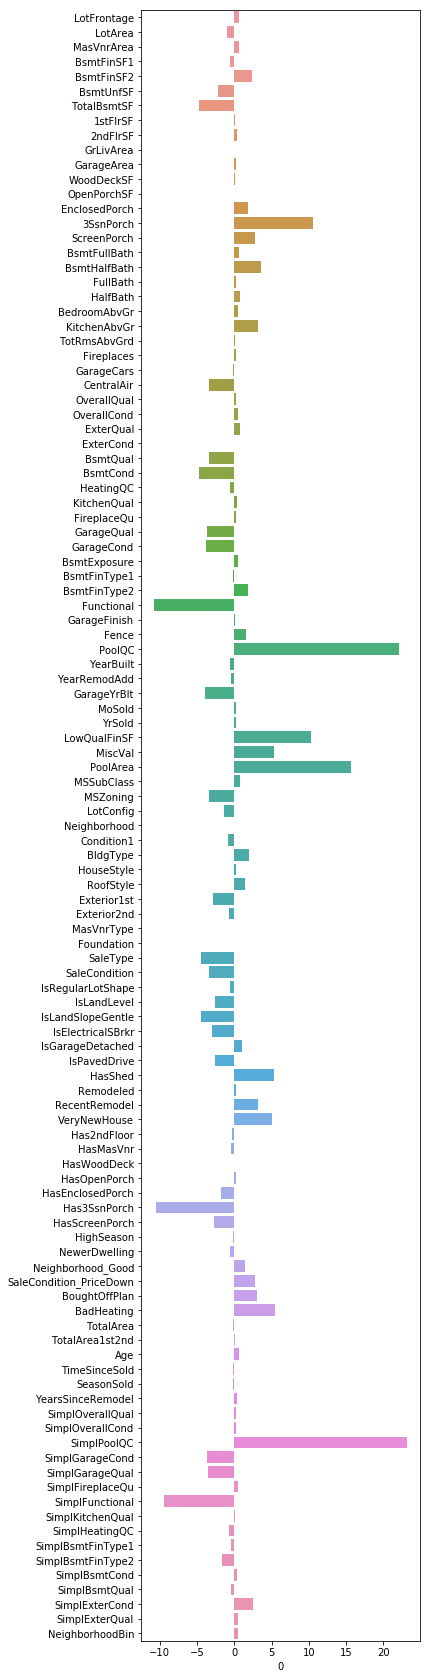

In [20]:
numeric_features = test_processed.dtypes[train_processed.dtypes != "object"].index
skewness = test_processed[numeric_features].skew(axis=0 , skipna =True)
skewness = pd.DataFrame(skewness)

plt.figure(figsize=[5,30])
# skw = sns.load_dataset(skewness)
ax = sns.barplot( y= skewness.index , x=skewness[0] , data = skewness)
plt.show()
# print('skew: ',test_processed[numeric_features].skew())

### Additional processing to scale the data.   

### One hot encoding
To encode categorical integer features as a one-hot numeric array we are using one hot encoding. This will transform each value of catagories into a features and make those a column value of dataframe. Finally put binary values in the rows of those column.

In [21]:
# for example:

# ╔════════════╦═════════════════╦════════╗ 
# ║ CompanyName Categoricalvalue ║ Price  ║
# ╠════════════╬═════════════════╣════════║ 
# ║ VW         ╬      1          ║ 20000  ║
# ║ Acura      ╬      2          ║ 10011  ║
# ║ Honda      ╬      3          ║ 50000  ║
# ║ Honda      ╬      3          ║ 10000  ║
# ╚════════════╩═════════════════╩════════╝

# converting it to one Hot encoding:

# ╔════╦══════╦══════╦════════╦
# ║ VW ║ Acura║ Honda║ Price  ║
# ╠════╬══════╬══════╬════════╬
# ║ 1  ╬ 0    ╬ 0    ║ 20000  ║
# ║ 0  ╬ 1    ╬ 0    ║ 10011  ║
# ║ 0  ╬ 0    ╬ 1    ║ 50000  ║
# ║ 0  ╬ 0    ╬ 1    ║ 10000  ║
# ╚════╩══════╩══════╩════════╝

# refrence: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In this section at first we merge train and test data (variable name predictor_cols and predictor_cols_test). We did it because there is some fetures in train data which is missing in test data again same thing can happen for test data too. 

In [22]:
# Convert categorical features using one-hot encoding.
def onehot(onehot_df, df, column_name, fill_na, drop_name):
    onehot_df[column_name] = df[column_name]
    if fill_na is not None:
        onehot_df[column_name].fillna(fill_na, inplace=True)

    dummies = pd.get_dummies(onehot_df[column_name], prefix="_" + column_name)

    onehot_df = onehot_df.join(dummies)
    onehot_df = onehot_df.drop([column_name], axis=1)
    return onehot_df


performing one hot

In [23]:

def proceed_onehot(df):
    onehot_df = pd.DataFrame(index = df.index)

    onehot_df = onehot(onehot_df, df, "MSSubClass", None, "40")
    onehot_df = onehot(onehot_df, df, "MSZoning", "RL", "RH")
    onehot_df = onehot(onehot_df, df, "LotConfig", None, "FR3")
    onehot_df = onehot(onehot_df, df, "Neighborhood", None, "OldTown")
    onehot_df = onehot(onehot_df, df, "Condition1", None, "RRNe")
    onehot_df = onehot(onehot_df, df, "BldgType", None, "2fmCon")
    onehot_df = onehot(onehot_df, df, "HouseStyle", None, "1.5Unf")
    onehot_df = onehot(onehot_df, df, "RoofStyle", None, "Shed")
    onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd", "CBlock")
    onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd", "CBlock")
    onehot_df = onehot(onehot_df, df, "Foundation", None, "Wood")
    onehot_df = onehot(onehot_df, df, "SaleType", "WD", "Oth")
    onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal", "AdjLand")

    # Fill in missing MasVnrType for rows that do have a MasVnrArea.
    temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
    idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
    temp_df.loc[idx, "MasVnrType"] = "BrkFace"
    onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None", "BrkCmn")

    # Also add the booleans from calc_df as dummy variables.
    onehot_df = onehot(onehot_df, df, "LotShape", None, "IR3")
    onehot_df = onehot(onehot_df, df, "LandContour", None, "Low")
    onehot_df = onehot(onehot_df, df, "LandSlope", None, "Sev")
    onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr", "FuseP")
    onehot_df = onehot(onehot_df, df, "GarageType", "None", "CarPort")
    onehot_df = onehot(onehot_df, df, "PavedDrive", None, "P")
    onehot_df = onehot(onehot_df, df, "MiscFeature", "None", "Othr")

    # Features we can probably ignore (but want to include anyway to see
    # if they make any positive difference).
    # Definitely ignoring Utilities: all records are "AllPub", except for
    # one "NoSeWa" in the train set and 2 NA in the test set.
    onehot_df = onehot(onehot_df, df, "Street", None, "Grvl")
    onehot_df = onehot(onehot_df, df, "Alley", "None", "Grvl")
    onehot_df = onehot(onehot_df, df, "Condition2", None, "PosA")
    onehot_df = onehot(onehot_df, df, "RoofMatl", None, "WdShake")
    onehot_df = onehot(onehot_df, df, "Heating", None, "Wall")

    # I have these as numerical variables too.
    onehot_df = onehot(onehot_df, df, "ExterQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "ExterCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "HeatingQC", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "KitchenQual", "TA", "Ex")
    onehot_df = onehot(onehot_df, df, "FireplaceQu", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "GarageQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "GarageCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "PoolQC", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtExposure", "None", "Gd")
    onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None", "GLQ")
    onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None", "GLQ")
    onehot_df = onehot(onehot_df, df, "Functional", "Typ", "Typ")
    onehot_df = onehot(onehot_df, df, "GarageFinish", "None", "Fin")
    onehot_df = onehot(onehot_df, df, "Fence", "None", "MnPrv")
    onehot_df = onehot(onehot_df, df, "MoSold", None, None)
    
    # Divide up the years between 1871 and 2010 in slices of 20 years.
    year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))

    yearbin_df = pd.DataFrame(index = df.index)
    yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
    yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)

    yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
    yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)
    
    onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None, None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None, None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None, None)

    return onehot_df

# Add the one-hot encoded categorical features.
onehot_df = proceed_onehot(train)
onehot_df = onehot(onehot_df, neighborhood_bin_train, "NeighborhoodBin", None, None)
train_processed = train_processed.join(onehot_df)


These onehot columns are missing in the test data, so drop them from the training data or we might overfit on them.

In [24]:
drop_cols = [
                "_Exterior1st_ImStucc", "_Exterior1st_Stone",
                "_Exterior2nd_Other","_HouseStyle_2.5Fin", 
            
                "_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll",
                "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn",
                "_Heating_Floor", "_Heating_OthW",

                "_Electrical_Mix", 
                "_MiscFeature_TenC",
                "_GarageQual_Ex", "_PoolQC_Fa"
            ]
train_processed.drop(drop_cols, axis=1, inplace=True)

In [25]:
onehot_df = proceed_onehot(test)
onehot_df = onehot(onehot_df, neighborhood_bin_test, "NeighborhoodBin", None, None)
test_processed = test_processed.join(onehot_df)

This column is missing in the training data. There is only one example with this value in the test set. So just drop it.

In [26]:
test_processed.drop(["_MSSubClass_150"], axis=1, inplace=True)

Drop these columns. They are either not very helpful or they cause overfitting.

In [27]:
drop_cols = [
    "_Condition2_PosN",    # only two are not zero
    "_MSZoning_C (all)",
    "_MSSubClass_160",
]
train_processed.drop(drop_cols, axis=1, inplace=True)
test_processed.drop(drop_cols, axis=1, inplace=True)

# log transform
We take the log here because the error metric is between the log of the
SalePrice and the log of the predicted price. That does mean we need to 
exp() the prediction to get an actual sale price.

In [28]:
target = pd.DataFrame(index = train_processed.index, columns=["SalePrice"])
target["SalePrice"] = np.log(train["SalePrice"])
# train_processed.drop(["SalePrice"], axis=1, inplace=True)

print("Training set size:", train_processed.shape)
print("Test set size:", test_processed.shape)

Training set size: (1458, 403)
Test set size: (1459, 403)


# Split Data for training and testing




In [29]:
X_train, X_test, y_train, y_test = train_test_split(train_processed, 
                                                    target,
#                                                     train_size = 0.99, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

#if want to use given test data
# X_test = test_processed


In [113]:
prediction_dict = dict()
submit = False
save_score = False

if submit :
    X_train = train_processed
    y_train = target
else:
    X_train = X_train
    y_train = y_train 

# Model selection

### Random Forest Regressor

In [31]:
my_model = RandomForestRegressor(n_estimators=500,n_jobs=-1)


my_model.fit(X_train, y_train)
prediction = my_model.predict(X_test)

prediction_dict['Random Forest Regressor'] = prediction

print('ann root mean absolute error: ',rmse(y_test, prediction))
print('accuracy score: ',  r2_score(np.array(y_test),prediction) )

/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ann root mean absolute error:  0.12215522637040445
accuracy score:  0.9119519813702366


### DecisionTree

In [32]:
from sklearn.tree import DecisionTreeRegressor
my_model = DecisionTreeRegressor()

my_model.fit(X_train, y_train)
prediction = my_model.predict(X_test)
prediction_dict['DecisionTree'] = prediction

print('ann root mean absolute error: ',rmse(y_test, prediction))
print('accuracy score: ',  r2_score(np.array(y_test),prediction) )

ann root mean absolute error:  0.20767901932107108
accuracy score:  0.7455041350263276


### Xgboost 


In [33]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=500, learning_rate=0.05)

my_model.fit(X_train, y_train)
prediction = my_model.predict(X_test)
prediction_dict['Xgboost'] = prediction

print('ann root mean absolute error: ',rmse(y_test, prediction))
print('accuracy score: ',  r2_score(np.array(y_test),prediction) )

ann root mean absolute error:  0.10926796451065869
accuracy score:  0.9295499691663187


## Lasso

In [34]:
from sklearn.linear_model import Lasso
my_model = Lasso(alpha=5e-4, max_iter=50000)


my_model.fit(X_train, y_train)
prediction = my_model.predict(X_test)
prediction_dict['Lasso'] = prediction

print('ann root mean absolute error: ',rmse(y_test, prediction))
print('accuracy score: ',  r2_score(np.array(y_test),prediction) )

ann root mean absolute error:  0.10425019755682248
accuracy score:  0.9358717697334371


# ANN

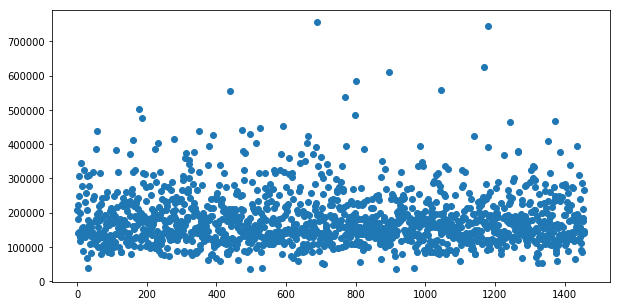

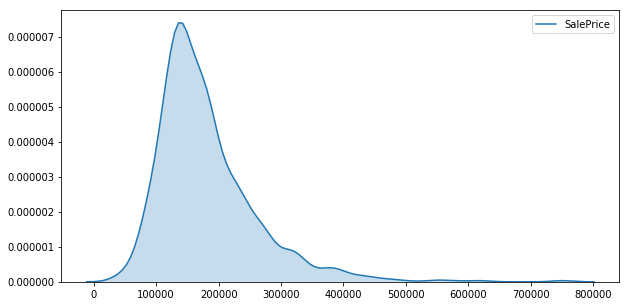

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5])
plt.scatter(range(len(train)),list(train.SalePrice.values))
plt.show()
plt.figure(figsize=[10,5])
sns.kdeplot(train.SalePrice, shade= True)
plt.show()

In the above graph we can see that the price range is in a normal distribution. If we provide tf.random.normal while initializing the weight it should be more helpful for training. And this initialization should provide better validation with low amount of epoches. In my kaggle score rmse 0.123 is found through random normal while uniform distribution provided rmse 0.127 score. Again Uniform distribution takes 3 times more epoches to reach rmse score 0.127. But for uniform distribution no improvement cant found after 16000 epoch and for normal distribution no improvement can't found after 6000 epoch.

#### Target
By observing the span of the data and the data distribution we can conclude that logistic regration should perform well for this kind of problem. So we can safely say that starting with single neuron in a single hidden layer should perform well and we should look for simpler solution. Again from theoretical perspective single neurone and single layer ANN is nothing but a logistic regration and after adding layers and neurons we can regularize them so that they behave more like a logistic regration model and then we can tune parameter such a way so that it can handle little bit more complexity than a logistic regration. Finally my target is to make sure that it performs well as a logistic regration model and then improve it with more neuron/layers and proper tuning of parameters.

In [36]:
# log_df = pd.DataFrame(columns=['learning_rate', 'num_steps', 'beta1','beta2','beta3', 'hidden_1' , 'hidden_2', 'hidden_3','input_dim' , 'test_rmse_score', 'test_r2_score'])
# log_df.to_csv("diffrent_training_results.csv", index=False)

### Ann parameters 

In [37]:

learning_rate = 0.1
num_steps = 6000
#for regularize weight matrix
beta1 = 0.1
beta2 = 0.00
beta3 = 0.00
beta4 = None

hidden_1 = 16
hidden_2 = 8
hidden_3 = 4
hidden_4 = None

minimum_validation_cost = 0.0190000

input_dim = X_train.shape[1]  # Number of features
output_dim = 1              # Because it is a regression problem
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )


Initialization of weight and bias with random values

In [38]:
weights = {
    'w1': tf.Variable(tf.random_normal([input_dim, hidden_1])),
    'w2': tf.Variable(tf.random_normal([hidden_1, hidden_2])),
    'w3': tf.Variable(tf.random_normal([hidden_2, hidden_3])),
    'out': tf.Variable(tf.random_normal([hidden_3, output_dim]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([hidden_1])),
    'b2': tf.Variable(tf.random_normal([hidden_2])),
    'b3': tf.Variable(tf.random_normal([hidden_3])),
    'out': tf.Variable(tf.random_normal([output_dim]))
}

Instructions for updating:
Colocations handled automatically by placer.


## Model

In the dataset Seles price are non negative number so our model is expected to return positive values so as a activation function I have used relu as it gives positive values. Again relu is easy to optimize because they are similar to linear units. The only diffrence is that a rectified linear unit outputs zero across half its domain. Thus derivatives through a rectified linear unit remain large whenever the unit is activate. The gradients are not only large but also consistent. 

In [39]:
def ann_model(X_val):
  # Hidden layers
    layer_1 = tf.add(tf.matmul(X_val, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    
    # Output layer
    layer_out = tf.add(tf.matmul(layer_3, weights['out']), biases['out'])

    return layer_out

For optimization I have used Adam optimizer. Adam derives from phrase “adaptive moments”. Its a varient of RMSProp. I have used adam instead of RMSProp for couple of reasons. First, in Adam, momentum is incorporated directly as an estimate of the ﬁrst-order moment (with exponential weighting) of the gradient. The most straightforward way to add momentum to RMSProp is to apply momentum to the rescaled gradients. The use of momentum in combination with rescaling does not have a clear theoretical motivation. Second, Adam includes bias corrections to the estimates of both the ﬁrst-order moments (the momentumterm) and the (uncentered) second-order moments to account for their initializationat the origin. RMSProp also incorporates an estimate of the (uncentered) second-order moment; however, it lacks the correction factor. Thus,unlike in Adam, the RMSProp second-order moment estimate may have high biasearly in training. Adam is generally regarded as being fairly robust to the choice of hyperparameters, though the learning rate sometimes needs to be changed fromthe suggested default. Usually default rate is .001 but for our case I have used 0.1 as it gives better optimization results. 

In [40]:
# Model Construct
model = ann_model(X_tf)

# Mean Squared Error cost function
cost = tf.reduce_mean(tf.square(y_tf - model))

# cost = tf.square(y_tf - model)
regularizer_1 = tf.nn.l2_loss(weights['w1'])
regularizer_2 = tf.nn.l2_loss(weights['w2'])
regularizer_3 = tf.nn.l2_loss(weights['w3'])
# cost = tf.reduce_mean(cost + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3)
cost = cost + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3

# Adam optimizer will update weights and biases after each step
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


# Initialize variables 
init = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()


Instructions for updating:
Use tf.cast instead.


## Training

In [41]:
train_LC = []
val_LC = []
session_var = None

In [42]:
def training_block(X_train,y_train, X_test,y_test):

    with tf.Session() as sess:
        #running initializer
        sess.run(init)
#         minimum_validation_cost = 0.0190000
        global minimum_validation_cost
        for i in range(num_steps):
    #         sess.run(optimizer, feed_dict={X_tf:X_train, y_tf:y_train})

            if submit :
                X_train = shuffle(train_processed , random_state = i)
                y_train = shuffle(target , random_state = i)
            else:
                X_train = shuffle(X_train , random_state = i)
                y_train = shuffle(y_train , random_state = i)

            trn_cost,_ = sess.run([cost,optimizer], feed_dict={X_tf:X_train, y_tf:y_train})
            tst_cost = sess.run(cost, feed_dict={X_tf:X_test, y_tf:y_test}) 
            if submit :
                new_minimum_validation_cost = np.min(trn_cost)
            else:
                new_minimum_validation_cost = np.min(tst_cost)

            if (i+1)%50 == 0:
                train_LC.append(trn_cost)
                val_LC.append(tst_cost)

            if (i+1)%500 == 0:
                print("epoch no : ",i+1, "  training cost: ",trn_cost, "  validation cost: ", tst_cost, "    minimum_validation_cost" , minimum_validation_cost)

            if new_minimum_validation_cost  < minimum_validation_cost :
                minimum_validation_cost = new_minimum_validation_cost
#                 global session_var
#                 session_var = sess

                    #         Save the variables to disk.
                save_path = saver.save(sess, "model/model.ckpt")
        
        if save_path:
            print("Model saved in path: %s" % save_path)



    #     pred = sess.run(model, feed_dict={X_tf: X_test})
    #     prediction = pred.squeeze()

    
training_block(X_train,y_train, X_test,y_test)

epoch no :  500   training cost:  7.2636204   validation cost:  7.2422786     minimum_validation_cost 0.019
epoch no :  1000   training cost:  1.1476336   validation cost:  1.1587694     minimum_validation_cost 0.019
epoch no :  1500   training cost:  0.455535   validation cost:  0.5471753     minimum_validation_cost 0.019
epoch no :  2000   training cost:  0.042749014   validation cost:  0.044969223     minimum_validation_cost 0.019
epoch no :  2500   training cost:  0.016805455   validation cost:  0.020285666     minimum_validation_cost 0.019
epoch no :  3000   training cost:  0.071226984   validation cost:  0.0808017     minimum_validation_cost 0.014994981
epoch no :  3500   training cost:  0.024075001   validation cost:  0.015417719     minimum_validation_cost 0.01461467
epoch no :  4000   training cost:  0.01806184   validation cost:  0.019995565     minimum_validation_cost 0.013664248
epoch no :  4500   training cost:  0.017636579   validation cost:  0.01846336     minimum_valida

### Grid search on epoch:
In the above block I have saved the model for the best validation score. As I mentioned earlier the epoch to reach the best validation accuracy is not fixed. Rather we can find it in 3 diffrent range of epoches. The reason behind this is mostly because of random initializing of the weight and if we have fixed the seed value then it might change into only one single epoch range. But doing so we loose chance to imrove our model further. Again if we want to ensamble diffrent ANN model it woun't help when we use same seed and state. I have tried 1000+ parameters and combination from the start and used graph to vizualize how to improve that but with grid search I might not get the exact idea why certain things provide good results or not and looking into every search result and graph is also too much so applying on the epoch seems to me more reasonable solution because the epoch for best validation result will be diffrent in every run.

#### Trick
I have suffeled the data in every epoch and this trick improved the validation accuracy. On the other hand I did't use batch because according to my previous experience this kind of logistic regration problem works better when its given as a whole set rather than batch or minibatch. But if its overfitting then passing the data in a batch / minibatch would perform better as it helps to generalize more. We can say its more like a dropout effect. And I have tried to do dropout to reduce distance of training and validation accuracy but that didn't worked well.

In [43]:
def Prediction_block(X_test):
    with tf.Session() as sess:
        # Restore variables from disk.
        saver.restore(sess, "model/model.ckpt")
        print("Model restored.")

        # Check the values of the variables
        pred =  sess.run(model, feed_dict={X_tf: X_test})
        prediction = pred.squeeze()
        return prediction
    #     print(np.exp(prediction))
    
prediction = Prediction_block(X_test)

pred_str = 'ANN_base_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model/model.ckpt
Model restored.


## Learning curve

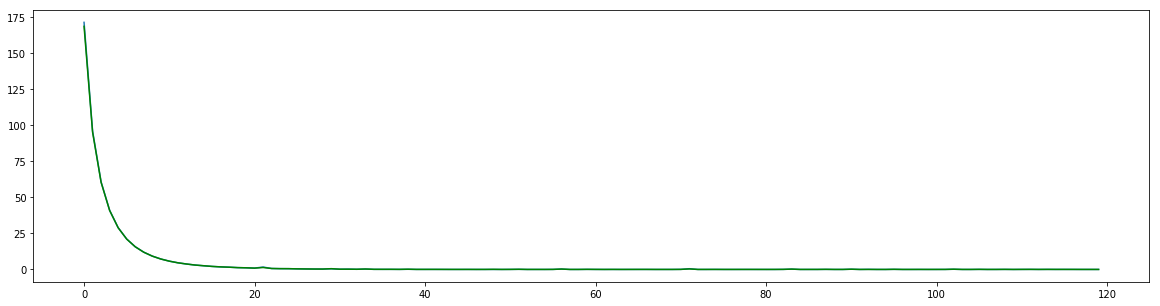

In [44]:
plt.figure(figsize=[20,5])
plt.plot(train_LC)
plt.plot(val_LC, 'g-')
plt.show()

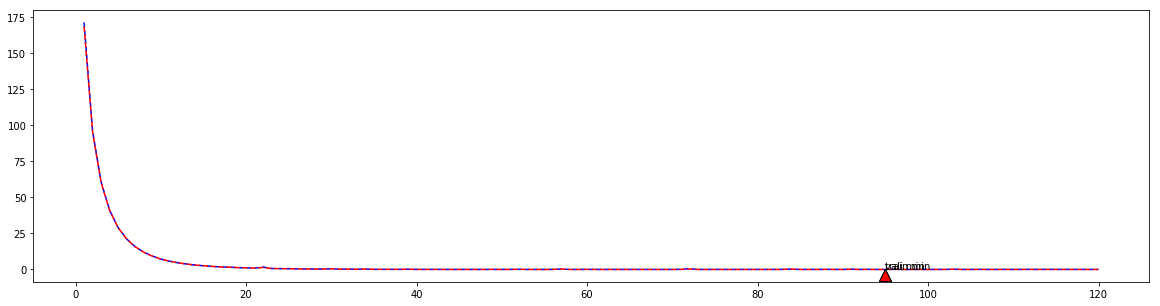

In [45]:
def learning_curve():
    xdata = list(range(1,len(train_LC)+1))
    minimum = min(train_LC)

    plt.figure(figsize=[20,5])
    plt.plot(xdata, train_LC, 'b--')
    plt.annotate('train min', xy=(xdata[train_LC.index(minimum)], minimum),
                 arrowprops=dict(facecolor='blue', shrink=0.05))

    minimum = min(val_LC)
    plt.plot(xdata, val_LC, 'r--')
    plt.annotate('vali min', xy=(xdata[val_LC.index(minimum)], minimum),
                 arrowprops=dict(facecolor='red', shrink=0.05))

    plt.show()

learning_curve()

## Acuracy Score

In [46]:
def accuracy(y_test,prediction):
    test_rmse_score = rmse(y_test, prediction)
    test_r2_score =  r2_score(np.array(y_test),prediction)
    return test_rmse_score, test_r2_score

test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )

ann root mean absolute error:  0.10379186334135627
accuracy score:  0.936434407536071


## Save score

In [47]:
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

## Parameters 

Following segment is actually initializing diffrent parameters. From the dataset we can see that the estimation of saleprice is a regration problem and nural network used here was overfitting most of the time due to higher varience. So for making it simpler I have penalized weight matrix of hidden layers with l2 regularization. Again I have found that single hidden layer with single neuron performs well and that means the prediction model dont need to be too complex. Thus I became ensured that regularization is going to improve performance.

### Hyperparameeter tuning
Few of my hyperparameeter tuning is shown in the following block. In this data if a hidden layer value is 0 then it means that the hidden layer is turned off. For example if hidden_3 = 0 then that means hidden layer 3 is removed from the model and the model have only 2 hidden layer. And all the score is done on a validation set which is not seen by the model while training. For most of the case it was a 80-20 split. In the following results I didint kept any cross validation results but I have used diffrent seed while splitting data due to diffrent seed sometimes good hyperparameeter also provided so so accuracy. But those so so results were similar to the results of XGBOOST so this gave me confidence to use this technique. 

In [48]:
log_df = pd.read_csv("diffrent_training_results.csv")
# print(log_df.to_string())
pd.set_option('display.max_rows', None)
log_df

,learning_rate,num_steps,beta1,beta2,beta3,hidden_1,hidden_2,hidden_3,input_dim,test_rmse_score,test_r2_score,hidden_4,beta4
0,0.050,7500.0,0.005,0.0050,0.005000,16.0,8.0,4.0,403.0,0.128456,8.949361e-01,NaN,NaN
1,0.040,2500.0,0.005,0.0050,0.005000,16.0,8.0,4.0,403.0,0.250470,6.005558e-01,NaN,NaN
2,0.050,7500.0,0.005,0.0050,0.005000,16.0,8.0,4.0,403.0,0.152580,8.517686e-01,NaN,NaN
3,0.050,7500.0,0.005,0.0050,0.005000,16.0,8.0,4.0,403.0,0.143409,8.690530e-01,NaN,NaN
4,0.050,7500.0,0.005,0.0050,0.005000,16.0,8.0,4.0,403.0,0.127356,8.967284e-01,NaN,NaN
5,0.050,7900.0,0.005,0.0050,0.005000,16.0,8.0,4.0,403.0,0.126758,8.976948e-01,NaN,NaN
6,0.050,1500.0,0.005,0.0050,0.005000,16.0,8.0,4.0,403.0,0.162495,8.318785e-01,NaN,NaN
7,0.050,1500.0,0.005,0.0050,0.005000,16.0,8.0,4.0,403.0,0.177628,7.991050e-01,NaN,NaN
8,0.050,7500.0,0.005,0.0050,0.005000,16.0,8.0,4.0,403.0,0.139909,8.753655e-01,NaN,NaN
9,0.050,7500.0,0.005,0.0050,0.005000,16.0,8.0,4.0,403.0,0.143775,8.683835e-01,NaN,NaN


### Observation and discovery :


- In the above parameter we can see that index 44 shows that for .001 learning parameeter the model does not predict anything so I have changed it slowly and finally What I have found that learning parameeter .1 and .05 provides the best results. 

- Beta1, Beta2, Beta3 represents the regularization parameter for hidden layer 1 ,2 and 3. Sometimes in the above table we can see that hidden layer 2,3 is 0 but there is some value for beta 2,3 that means the layer is actually off so those values actually means nothing. 

- For beta1, beta2 and beta3 .005 gives significant amount of improvement while learing rate is .1 or .05 . But when learning rate is .1 and beta1=.1 , beta2=0, beta3=0 then the model performs better most of the time and it also takes less epoches to train for the best validation accuracy

- From index 63 to 69 I have tried to use 200 , 100 , 30 neurons because the data have 403 features and its a common practice to use half amount of the neuron in the first hidden layer and this stratigy does not work good enough but with my selected parameter it improved a little bit. I have used 16-8-4 combination of neuron because of this common practice. for our case 16 neuron in the first layer provided better accuracy and adding 8 and 4 in the next 2 layer improved the stability of the model and now it gives good validation accuracy after 2000 epch and the best validation accuracy remanins between the epoch range of 2000-2500 , 3300-3600 or 5000-5400 .

- From index 70 to 78 we can see that single neuron with single hidden layer performs well according to the plan staed in the target section. Then I have increased neurons and the learning curve for them is in the folowing block. Where y axis shows rmse and x axis shows i and i*50 represents the epoch no. Again blue curve is for training accuracy and green for validation accuracy


#### For single nuron learning rate

<img src="img/1">

#### For 4 nuron learning curve

<img src="img/4">

#### For 16 nuron learning curve

<img src="img/16">
</br>

#### For 32 nuron learning curve

<img src="img/32">


- From the above graph we can say that for single neuron learning curve is not very stable but when neuron increases upto 32 that curve become smoother. But when submitted to kaggle 16 nuron performs better than 32 and 4 so choosing it over others is helpful. 

# Cross validation

In [54]:


# from sklearn.model_selection import KFold
# from sklearn.model_selection import RepeatedKFold
# kf = KFold(n_splits=10, shuffle=True)

# kf_rmse_list = []
# kf_r2_list = []

# # train_processed['SalePrice'] = target.values
# for train_index, test_index in kf.split(train_processed):
#     X_train, X_test = train_processed.iloc[train_index] , train_processed.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
#     training_block(X_train,y_train, X_test,y_test)
#     prediction = Prediction_block(X_test)
#     test_rmse_score, test_r2_score = accuracy(y_test, prediction)
    
#     kf_rmse_list.append(test_rmse_score)
#     kf_r2_list.append(test_r2_score)
    
#     print("r2 list print", kf_r2_list)
#     print('rmse list print',kf_rmse_list)

# print("r2 mean print", np.mean(kf_r2_list))
# print('rmse mean print', np.mean(kf_rmse_list))

# Observing Few Other well performed ANN models

## ANN with 4 layers

In [77]:
def weight_bais():
    global weights, biases
    weights = {
        'w1': tf.Variable(tf.random_normal([input_dim, hidden_1])),
        'w2': tf.Variable(tf.random_normal([hidden_1, hidden_2])),
        'w3': tf.Variable(tf.random_normal([hidden_2, hidden_3])),
        'w4': tf.Variable(tf.random_normal([hidden_3, hidden_4])),
        'out': tf.Variable(tf.random_normal([hidden_4, output_dim]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([hidden_1])),
        'b2': tf.Variable(tf.random_normal([hidden_2])),
        'b3': tf.Variable(tf.random_normal([hidden_3])),
        'b4': tf.Variable(tf.random_normal([hidden_4])),
        'out': tf.Variable(tf.random_normal([output_dim]))
    }

In [78]:
def ann_model(X_val):
  # Hidden layers
    layer_1 = tf.add(tf.matmul(X_val, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_3, weights['w4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    # Output layer
    layer_out = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])

    return layer_out

In [79]:
def miscellaneous_initialization():
    global model, cost , regularizer_1 , regularizer_2 ,regularizer_3, regularizer_4, optimizer , init , saver
    # Model Construct
    model = ann_model(X_tf)

    # Mean Squared Error cost function
    cost = tf.reduce_mean(tf.square(y_tf - model))

    # cost = tf.square(y_tf - model)
    regularizer_1 = tf.nn.l2_loss(weights['w1'])
    regularizer_2 = tf.nn.l2_loss(weights['w2'])
    regularizer_3 = tf.nn.l2_loss(weights['w3'])
    regularizer_4 = tf.nn.l2_loss(weights['w4'])
    # cost = tf.reduce_mean(cost + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3)
    cost = cost + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3 + beta4*regularizer_4

    # Adam optimizer will update weights and biases after each step
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


    # Initialize variables 
    init = tf.global_variables_initializer()

    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()


epoch no :  500   training cost:  1992.58   validation cost:  1992.647     minimum_validation_cost 0.1701
epoch no :  1000   training cost:  1788.6418   validation cost:  1788.4534     minimum_validation_cost 0.1701
epoch no :  1500   training cost:  1619.1815   validation cost:  1618.9395     minimum_validation_cost 0.1701
epoch no :  2000   training cost:  1473.2156   validation cost:  1472.9794     minimum_validation_cost 0.1701
epoch no :  2500   training cost:  1339.4309   validation cost:  1339.2028     minimum_validation_cost 0.1701
epoch no :  3000   training cost:  1213.3549   validation cost:  1213.1512     minimum_validation_cost 0.1701
epoch no :  3500   training cost:  1093.5609   validation cost:  1093.3997     minimum_validation_cost 0.1701
epoch no :  4000   training cost:  979.31384   validation cost:  979.18744     minimum_validation_cost 0.1701
epoch no :  4500   training cost:  870.1869   validation cost:  870.0722     minimum_validation_cost 0.1701
epoch no :  5000

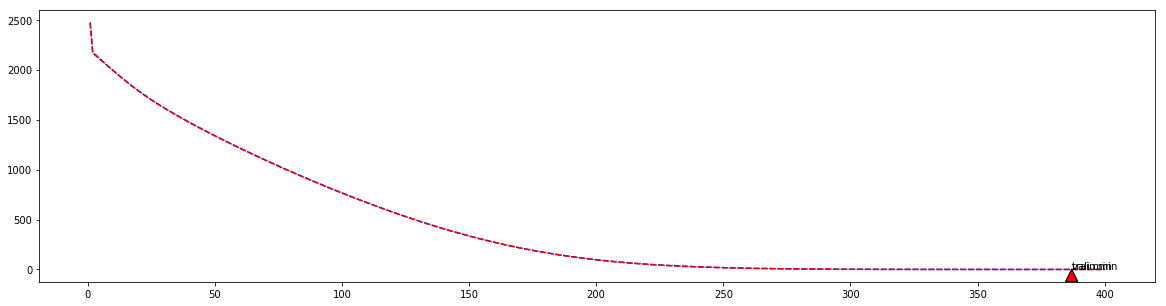

In [83]:
learning_rate = 0.1
num_steps = 20000
#for regularize weight matrix
beta1 = 0.1
beta2 = 0.05
beta3 = 0.00
beta4 = 0.0

hidden_1 = 76
hidden_2 = 48
hidden_3 = 32
hidden_4 = 16
minimum_validation_cost = 0.1701000
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []
training_block(X_train,y_train, X_test,y_test)
prediction = Prediction_block(X_test)
test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
learning_curve()

pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

epoch no :  500   training cost:  37312.195   validation cost:  24641.844     minimum_validation_cost 0.1701
epoch no :  1000   training cost:  6097.943   validation cost:  10312.802     minimum_validation_cost 0.1701
epoch no :  1500   training cost:  5748.5483   validation cost:  9064.71     minimum_validation_cost 0.1701
epoch no :  2000   training cost:  5488.708   validation cost:  6492.3994     minimum_validation_cost 0.1701
epoch no :  2500   training cost:  5210.8296   validation cost:  5934.0566     minimum_validation_cost 0.1701
epoch no :  3000   training cost:  4961.926   validation cost:  5504.4155     minimum_validation_cost 0.1701
epoch no :  3500   training cost:  4969.179   validation cost:  5071.12     minimum_validation_cost 0.1701
epoch no :  4000   training cost:  4459.373   validation cost:  4512.055     minimum_validation_cost 0.1701
epoch no :  4500   training cost:  4205.945   validation cost:  4230.184     minimum_validation_cost 0.1701
epoch no :  5000   trai

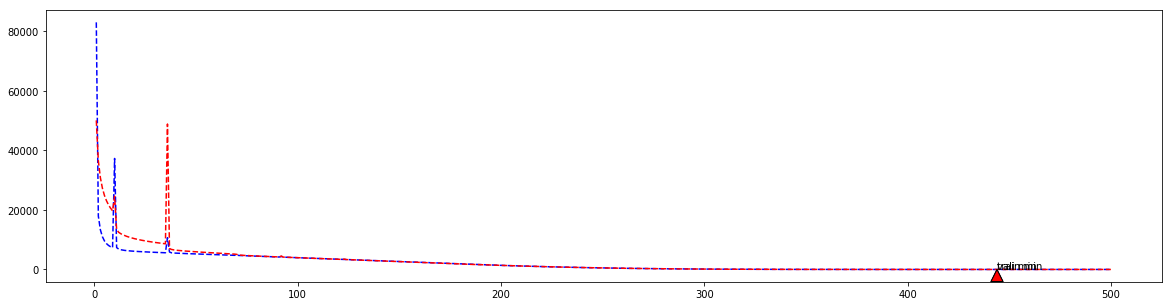

In [61]:
learning_rate = 0.05
num_steps = 25000
#for regularize weight matrix
beta1 = 0.1
beta2 = 0.05
beta3 = 0.00
beta4 = 0.0

hidden_1 = 256
hidden_2 = 128
hidden_3 = 16
hidden_4 = 4


minimum_validation_cost = 0.1701000
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []
training_block(X_train,y_train, X_test,y_test)
prediction = Prediction_block(X_test)

test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
learning_curve()



pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

epoch no :  500   training cost:  59.57842   validation cost:  59.44548     minimum_validation_cost 0.1901
epoch no :  1000   training cost:  19.23262   validation cost:  19.205208     minimum_validation_cost 0.1901
epoch no :  1500   training cost:  6.877101   validation cost:  6.8759766     minimum_validation_cost 0.1901
epoch no :  2000   training cost:  2.465673   validation cost:  2.473518     minimum_validation_cost 0.1901
epoch no :  2500   training cost:  0.7552396   validation cost:  0.7659047     minimum_validation_cost 0.1901
epoch no :  3000   training cost:  0.22087435   validation cost:  0.22506109     minimum_validation_cost 0.1901
epoch no :  3500   training cost:  0.059700027   validation cost:  0.062546745     minimum_validation_cost 0.06261047
epoch no :  4000   training cost:  0.020382574   validation cost:  0.02301677     minimum_validation_cost 0.022979949
epoch no :  4500   training cost:  0.012752805   validation cost:  0.015564648     minimum_validation_cost 0.

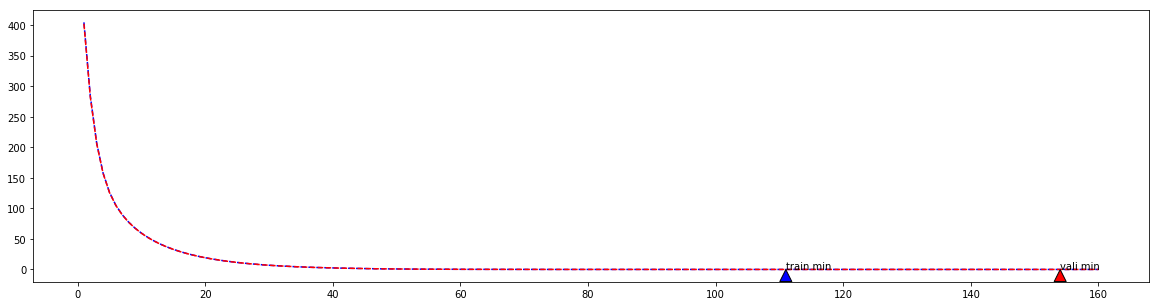

In [63]:
learning_rate = 0.1
num_steps = 8000
#for regularize weight matrix
beta1 = 0.1
beta2 = 0.0
beta3 = 0.00
beta4 = 0.0

hidden_1 = 16
hidden_2 = 8
hidden_3 = 4
hidden_4 = 2

minimum_validation_cost = 0.1901000

#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []
training_block(X_train,y_train, X_test,y_test)
prediction = Prediction_block(X_test)

test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
learning_curve()


pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

In the above graph we can see that the minimum of training and validation is no where near each other so its better to use the model where training minimum and validation minimum is close. When both of them are close we can use the epoch no of the train_min loss as val_min loss epoch no and then we can train over all the dataset without depending on the epoch number.I wanted to remove the epoch dependency because the model does not give same result in same epoch every time. This is why we are not using it as our best model.

## ANN single hidden layer

In [64]:
def weight_bais():
    global weights, biases
    weights = {
        'w1': tf.Variable(tf.random_normal([input_dim, hidden_1])),
        'out': tf.Variable(tf.random_normal([hidden_1, output_dim]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([hidden_1])),
        'out': tf.Variable(tf.random_normal([output_dim]))
    }

In [65]:
def ann_model(X_val):
  # Hidden layers
    layer_1 = tf.add(tf.matmul(X_val, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    # Output layer
    layer_out = tf.add(tf.matmul(layer_1, weights['out']), biases['out'])

    return layer_out

In [66]:
def miscellaneous_initialization():
    global model, cost , regularizer_1 , regularizer_2 ,regularizer_3, regularizer_4, optimizer , init , saver
    # Model Construct
    model = ann_model(X_tf)

    # Mean Squared Error cost function
    cost = tf.reduce_mean(tf.square(y_tf - model))

    # cost = tf.square(y_tf - model)
    regularizer_1 = tf.nn.l2_loss(weights['w1'])

    # cost = tf.reduce_mean(cost + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3)
    cost = cost + beta1*regularizer_1 

    # Adam optimizer will update weights and biases after each step
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


    # Initialize variables 
    init = tf.global_variables_initializer()

    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()


epoch no :  500   training cost:  1.3991009   validation cost:  1.4060487     minimum_validation_cost 0.01901
epoch no :  1000   training cost:  0.05246723   validation cost:  0.055251427     minimum_validation_cost 0.01901
epoch no :  1500   training cost:  0.015459971   validation cost:  0.019575113     minimum_validation_cost 0.018133882
epoch no :  2000   training cost:  0.03525339   validation cost:  0.048929054     minimum_validation_cost 0.017836023
epoch no :  2500   training cost:  0.016911697   validation cost:  0.019836253     minimum_validation_cost 0.016866
epoch no :  3000   training cost:  0.03488657   validation cost:  0.029194376     minimum_validation_cost 0.016060134
epoch no :  3500   training cost:  0.035446696   validation cost:  0.040574808     minimum_validation_cost 0.015489975
epoch no :  4000   training cost:  0.013580794   validation cost:  0.015519213     minimum_validation_cost 0.014235448
epoch no :  4500   training cost:  0.038968984   validation cost:  

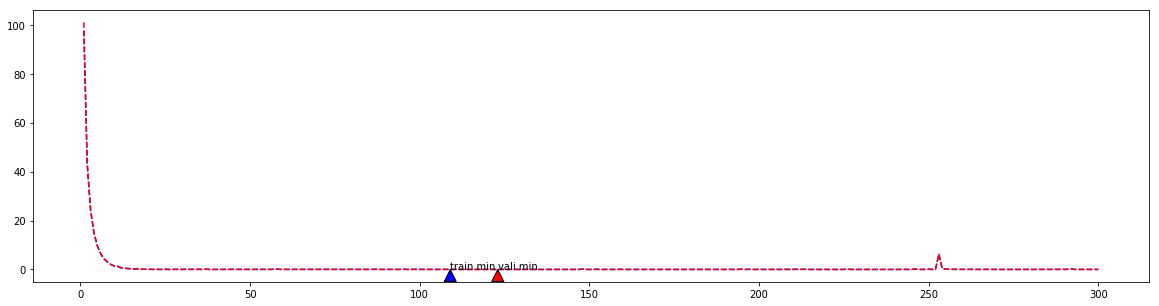

In [67]:
learning_rate = 0.1
num_steps = 15000
#for regularize weight matrix
beta1 = 0.1
beta2 = None
beta3 = None
beta4 = None
minimum_validation_cost = 0.01901000
hidden_1 = 16
hidden_2 = None
hidden_3 = None
hidden_4 = None

#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []
training_block(X_train,y_train, X_test,y_test)
prediction = Prediction_block(X_test)

test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
learning_curve()


pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

epoch no :  500   training cost:  0.012593379   validation cost:  0.02978582     minimum_validation_cost 0.02701
epoch no :  1000   training cost:  0.0096054785   validation cost:  0.023384107     minimum_validation_cost 0.022128448
epoch no :  1500   training cost:  0.008386719   validation cost:  0.019650884     minimum_validation_cost 0.019086264
epoch no :  2000   training cost:  0.008003918   validation cost:  0.019379662     minimum_validation_cost 0.018400492
epoch no :  2500   training cost:  0.0077785496   validation cost:  0.019919107     minimum_validation_cost 0.018400492
epoch no :  3000   training cost:  0.007578193   validation cost:  0.020208292     minimum_validation_cost 0.018400492
epoch no :  3500   training cost:  0.0075389575   validation cost:  0.020482453     minimum_validation_cost 0.018400492
epoch no :  4000   training cost:  0.007417453   validation cost:  0.019947235     minimum_validation_cost 0.018400492
epoch no :  4500   training cost:  0.050410505   va

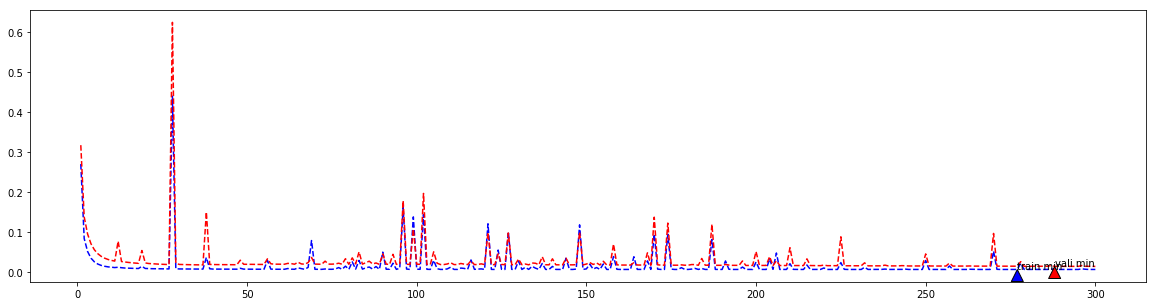

In [68]:
learning_rate = 0.1
num_steps = 15000
#for regularize weight matrix
beta1 = 0
beta2 = None
beta3 = None
beta4 = None

hidden_1 = 1
hidden_2 = None
hidden_3 = None
hidden_4 = None
minimum_validation_cost = 0.02701000
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []
training_block(X_train,y_train, X_test,y_test)
prediction = Prediction_block(X_test)

test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
learning_curve()

pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

epoch no :  500   training cost:  0.023748225   validation cost:  0.057272233     minimum_validation_cost 0.01901
epoch no :  1000   training cost:  0.012594812   validation cost:  0.029343583     minimum_validation_cost 0.01901
epoch no :  1500   training cost:  0.009685876   validation cost:  0.021429922     minimum_validation_cost 0.01901
epoch no :  2000   training cost:  0.00841474   validation cost:  0.017978802     minimum_validation_cost 0.017984655
epoch no :  2500   training cost:  0.007865009   validation cost:  0.016390596     minimum_validation_cost 0.016394224
epoch no :  3000   training cost:  0.007630902   validation cost:  0.015689325     minimum_validation_cost 0.0155653525
epoch no :  3500   training cost:  0.0074703894   validation cost:  0.015261964     minimum_validation_cost 0.015058355
epoch no :  4000   training cost:  0.007350236   validation cost:  0.015004656     minimum_validation_cost 0.014913863
epoch no :  4500   training cost:  0.007286668   validation 

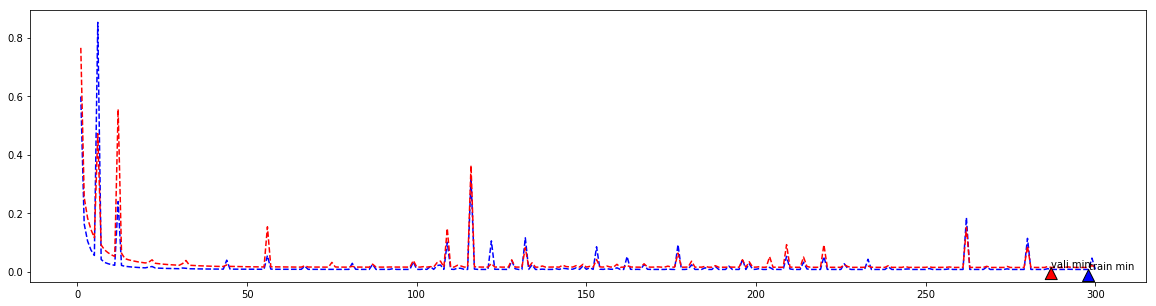

In [69]:
learning_rate = 0.1
num_steps = 15000
#for regularize weight matrix
beta1 = 0
beta2 = None
beta3 = None
beta4 = None

hidden_1 = 2
hidden_2 = None
hidden_3 = None
hidden_4 = None
minimum_validation_cost = 0.01901000
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []
training_block(X_train,y_train, X_test,y_test)
prediction = Prediction_block(X_test)

test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
learning_curve()

pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

## No hidden layer

In [70]:
def weight_bais():
    global weights, biases
    weights = {
        'out': tf.Variable(tf.random_normal([input_dim, output_dim]))
    }
    biases = {
        'out': tf.Variable(tf.random_normal([output_dim]))
    }

In [71]:
def ann_model(X_val):
 
    # Output layer
    layer_out = tf.add(tf.matmul(X_val, weights['out']), biases['out'])

    return layer_out

In [72]:
def miscellaneous_initialization():
    global model, cost , regularizer_1 , regularizer_2 ,regularizer_3, regularizer_4, optimizer , init , saver
    # Model Construct
    model = ann_model(X_tf)

    # Mean Squared Error cost function
    cost = tf.reduce_mean(tf.square(y_tf - model))



    # Adam optimizer will update weights and biases after each step
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


    # Initialize variables 
    init = tf.global_variables_initializer()

    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()


epoch no :  500   training cost:  0.013934864   validation cost:  0.062625684     minimum_validation_cost 0.025501
epoch no :  1000   training cost:  0.009146453   validation cost:  0.032428138     minimum_validation_cost 0.025501
epoch no :  1500   training cost:  0.008186035   validation cost:  0.024235057     minimum_validation_cost 0.02424109
epoch no :  2000   training cost:  0.007767049   validation cost:  0.021765308     minimum_validation_cost 0.021784522
epoch no :  2500   training cost:  0.007476338   validation cost:  0.020837175     minimum_validation_cost 0.020838091
epoch no :  3000   training cost:  0.026527148   validation cost:  0.050953805     minimum_validation_cost 0.020281613
epoch no :  3500   training cost:  0.007221891   validation cost:  0.020499144     minimum_validation_cost 0.020074865
epoch no :  4000   training cost:  0.007304225   validation cost:  0.019929256     minimum_validation_cost 0.019969398
epoch no :  4500   training cost:  0.2046152   validatio

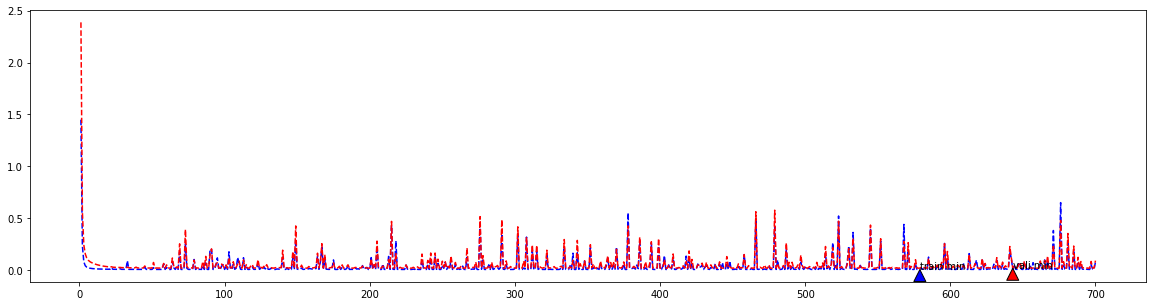

In [73]:
learning_rate = 0.1
num_steps = 35000
#for regularize weight matrix
beta1 = None
beta2 = None
beta3 = None
beta4 = None

hidden_1 = None
hidden_2 = None
hidden_3 = None
hidden_4 = None
minimum_validation_cost = 0.025501000
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []
training_block(X_train,y_train, X_test,y_test)
prediction = Prediction_block(X_test)

test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
learning_curve()

pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

# Ensamble 

In [112]:
prediction = .4*prediction_dict['ANN base'] + .2*prediction_dict['Lasso'] + .4*prediction_dict['Xgboost']
test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )

ann root mean absolute error:  0.10079127547262394
accuracy score:  0.9400566012140192


# Prepare Submission File
To use this section please uncomment the last line of split data section and comment accuracy section.

In [74]:

#if want to use given test data
if submit:
    X_test = test_processed

    with tf.Session() as sess:
        # Restore variables from disk.
        saver.restore(sess, "model/model.ckpt")
        print("Model restored.")

        # Check the values of the variables
        pred =  sess.run(model, feed_dict={X_tf: X_test})
        prediction = pred.squeeze()

    prediction = np.exp(prediction)

    pred_df = pd.DataFrame(prediction, index=test["Id"], columns=["SalePrice"])
    pred_df.to_csv('output.csv', header=True, index_label='Id')


# Reference


## xgboost:
https://www.kaggle.com/dansbecker/xgboost

https://medium.com/@gabrieltseng/gradient-boosting-and-xgboost-c306c1bcfaf5



## regration + graph :
https://www.kaggle.com/janiobachmann/predicting-house-prices-regression-techniques


## Selecting and Filtering Data
https://www.kaggle.com/dansbecker/selecting-and-filtering-in-pandas

## Handling Missing Values
https://www.kaggle.com/dansbecker/handling-missing-values



## why use conditional probability coding
https://medium.com/airbnb-engineering/designing-machine-learning-models-7d0048249e69

## one hot encoding
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

https://medium.com/@rajatgupta310198/getting-started-with-neural-network-for-regression-and-tensorflow-58ad3bd75223

## class example
https://colab.research.google.com/drive/1MExQ52bvHSPaUrGe8RvHZifvE6K6a0qh?fbclid=IwAR2EUWi4q6_q0mFbXQwGh4GNgB2Ex_WpP3K0L12182PdzszWSsEfzHf0REo#forceEdit=true&offline=true&sandboxMode=true&scrollTo=-Rh3-Vt9Nev9

## Some more
https://www.kaggle.com/klyusba/house-prices-advanced-regression-techniques/lasso-model-for-regression-problem/notebook

https://www.kaggle.com/juliencs/house-prices-advanced-regression-techniques/a-study-on-regression-applied-to-the-ames-dataset/ 

https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

## For descriptive section 
I have inspired form Ian Goodfellows book and used his way of explanation to explain my choice. His book can be found here:
https://www.deeplearningbook.org/

http://www.iro.umontreal.ca/~bengioy/talks/IJCAI-13july2018.pdf
